In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('output.xlsx')

In [3]:
df.head()

,Unnamed: 0,funded_amnt,funded_amnt_inv,issue_d,loan_status,pymnt_plan,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,r1,r2,r3,r4
0,0,5150,5150.0,Nov-11,1,n,266.22,266.22,7674.25000,7674.25,4883.78,2790.47,0.0,0.0,0.0,0.0,0.0,0.571375,1.000000
1,1,20000,20000.0,Oct-11,0,n,0.00,0.00,22610.98773,22610.99,20000.00,2610.99,0.0,0.0,0.0,0.0,0.0,0.130550,1.000000
2,2,12800,12750.0,Nov-11,0,n,0.00,0.00,14401.17047,14344.92,12800.00,1601.17,0.0,0.0,0.0,0.0,0.0,0.125091,0.996094
3,3,14000,14000.0,Oct-11,0,n,0.00,0.00,14793.06399,14793.06,14000.00,793.06,0.0,0.0,0.0,0.0,0.0,0.056647,1.000000
4,4,15000,14975.0,Nov-11,1,n,754.69,753.37,21457.45000,21421.81,14245.32,7212.13,0.0,0.0,0.0,0.0,0.0,0.506281,0.998333


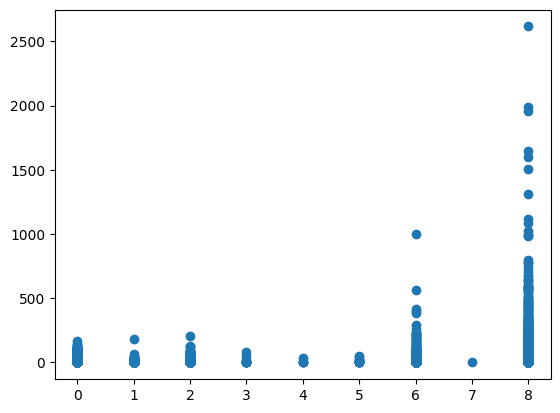

In [4]:
plt.scatter(df['loan_status'], df['r1'])

In [26]:
df['good_bad'] = np.zeros(len(df))

In [27]:
for i in list(df.index):

    if(df['loan_status'][i] < 2): 
        df['r1_out'] = 1

    elif (df['loan_status'][i] == 2):
        if(df['r1'][i] < 100):
            df['r1_out'][i] = 1
        else:
            df['r1_out'][i] = 0

    elif (df['loan_status'][i] == 3):
        if (df['r1'][i] < 75):
            df['r1_out'][i] = 1
        else:
            df['r1_out'][i] = 0

    elif (df['loan_status'][i] == 4):
        if (df['r1'][i] < 50):
            df['r1_out'][i] = 1
        else:
            df['r1_out'][i] = 0

    else: 
        df['r1_out'][i] = 0

C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_14672\1126721441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good_bad'][i] = 1
C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_14672\1126721441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good_bad'][i] = 0
C:\Users\Anirvan Krishna\AppData\Local\Temp\ipykernel_14672\1126721441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good_bad'][i] = 1
C:\

In [29]:
df[df['loan_status'].isin([2, 3, 4])]

,Unnamed: 0,funded_amnt,funded_amnt_inv,issue_d,loan_status,pymnt_plan,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,r1,r2,r3,r4,good_bad
59,59,1000,500.0,Jul-07,2,n,0.00,0.00,1204.076744,602.04,1000.00,204.08,0.00,0.0,0.0,0.000000,0.0,0.204080,0.500000,1.0
1263,1263,4500,1325.0,Jul-07,2,n,0.00,0.00,5418.479706,1595.44,4500.00,918.48,0.00,0.0,0.0,0.000000,0.0,0.204107,0.294444,1.0
1676,1676,4000,625.0,Jul-07,2,n,0.00,0.00,5015.060693,783.60,4000.00,1015.06,0.00,0.0,0.0,0.000000,0.0,0.253765,0.156250,1.0
2259,2259,1250,75.0,Jul-07,2,n,0.00,0.00,1516.971229,91.02,1250.00,266.97,0.00,0.0,0.0,0.000000,0.0,0.213576,0.060000,1.0
2306,2306,9000,1425.0,Jul-07,2,n,0.00,0.00,10075.193810,1595.24,9000.00,1075.19,0.00,0.0,0.0,0.000000,0.0,0.119466,0.158333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,42068,8125,8125.0,Sep-11,3,n,231.72,231.72,12392.650000,12392.65,7893.28,4499.37,0.00,0.0,0.0,0.000000,0.0,0.570025,1.000000,1.0
42195,42195,12600,12600.0,Sep-11,3,n,782.86,782.86,18848.960000,18848.96,11817.13,6983.17,48.66,0.0,0.0,51.883664,0.0,0.590936,1.000000,1.0
42284,42284,4450,4450.0,Oct-11,3,n,213.78,213.78,6755.140000,6755.14,4236.22,2518.92,0.00,0.0,0.0,0.000000,0.0,0.594615,1.000000,1.0
42392,42392,15000,15000.0,Oct-11,4,n,1129.50,1129.50,21824.960000,21824.96,13870.50,7954.46,0.00,0.0,0.0,0.000000,0.0,0.573480,1.000000,1.0


In [5]:
from sklearn.cluster import DBSCAN, KMeans

In [9]:
model = DBSCAN()

In [38]:
X = df['loan_status'] 

In [39]:
filtered_indices = X[X.isin([2, 3, 4])].index

In [40]:
filtered_indices

Int64Index([   59,  1263,  1676,  2259,  2306,  3242,  3623,  3627,  3629,
             3630,
            ...
            41823, 41874, 41880, 41909, 41927, 42068, 42195, 42284, 42392,
            42410],
           dtype='int64', length=2009)

In [34]:
X = np.array(df['r1']).reshape(len(df), 1)
y = np.array(df['loan_status']).reshape(len(df), 1)

In [11]:
arr = np.hstack((X, y))

In [41]:
arr = arr[filtered_indices]

In [42]:
arr

array([[0., 2.],
       [0., 2.],
       [0., 2.],
       ...,
       [0., 3.],
       [0., 4.],
       [0., 3.]])

In [43]:
labels = model.fit_predict(arr)

In [46]:
data = pd.DataFrame(arr)
data

,0,1
0,0.000000,2.0
1,0.000000,2.0
2,0.000000,2.0
3,0.000000,2.0
4,0.000000,2.0
...,...,...
2004,0.000000,3.0
2005,51.883664,3.0
2006,0.000000,3.0
2007,0.000000,4.0


In [47]:
data['label'] = labels

<AxesSubplot: xlabel='1', ylabel='0'>

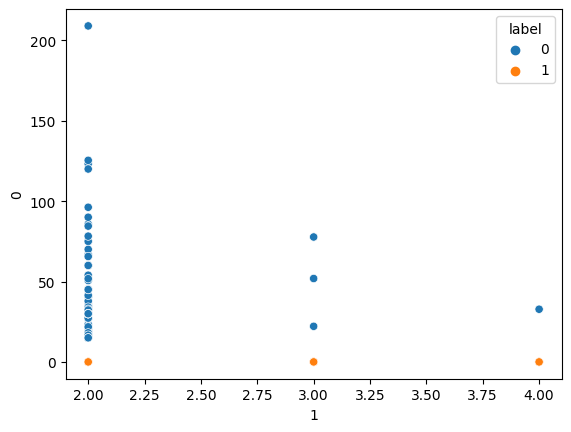

In [51]:
sns.scatterplot(x = data[1], y = data[0], hue=data['label'])

In [91]:
Km = KMeans(n_clusters=2)

In [92]:
data['label'] = Km.fit_predict(arr)

C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='1', ylabel='0'>

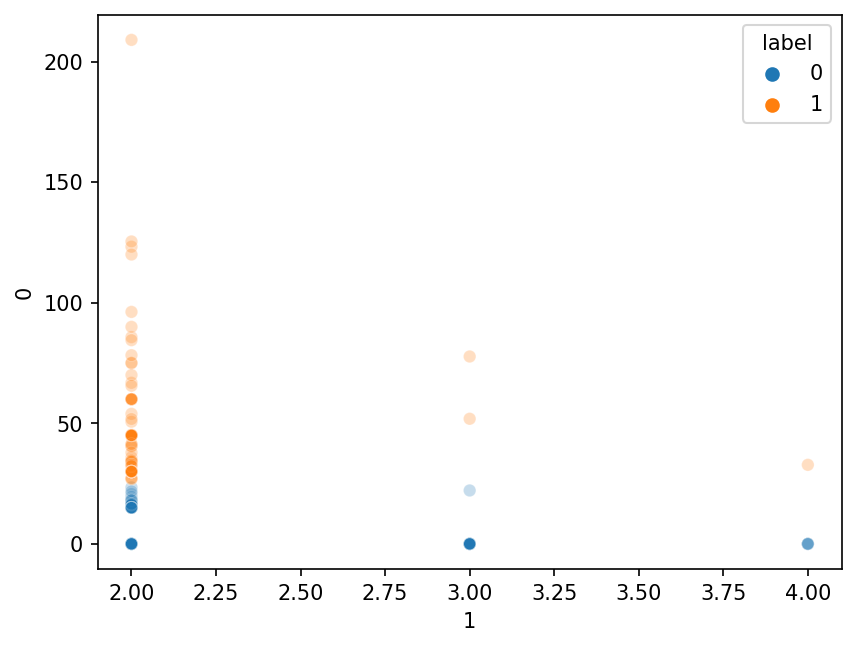

In [98]:
plt.figure(dpi=150)
sns.scatterplot(x=data[1], y=data[0], hue=data['label'], alpha=0.25)

In [65]:
from sklearn.mixture import GaussianMixture

In [88]:
gmm = GaussianMixture(n_components=2)

In [100]:
data['label'] = gmm.fit_predict(arr)

<AxesSubplot: xlabel='1', ylabel='0'>

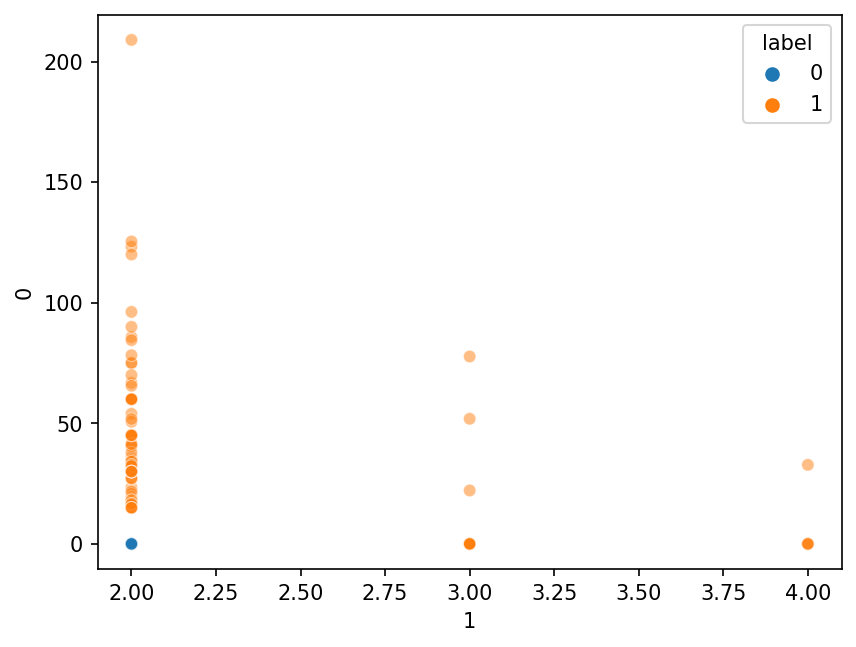

In [102]:
plt.figure(dpi=150)
sns.scatterplot(x=data[1], y=data[0], hue=data['label'], alpha=0.5)

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
model = AgglomerativeClustering(n_clusters=2)

In [71]:
data['label'] = model.fit_predict(arr)

<AxesSubplot: xlabel='1', ylabel='0'>

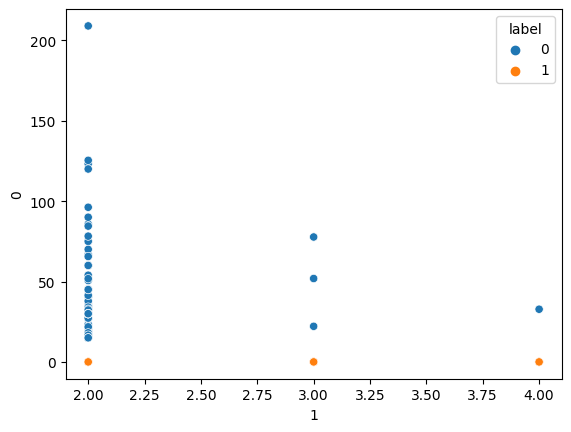

In [72]:
sns.scatterplot(x=data[1], y=data[0], hue=data['label'])

In [111]:
X_r2 = np.array(df['r2']).reshape(len(df), 1)
X_r3 = np.array(df['r3']).reshape(len(df), 1)
X_r4 = np.array(df['r4']).reshape(len(df), 1)

In [112]:
arr_r2 = np.hstack((X_r2, y))
arr_r3 = np.hstack((X_r3, y))
arr_r4 = np.hstack((X_r2, y))

In [115]:
arr_r2 = arr_r2[filtered_indices]
arr_r3 = arr_r3[filtered_indices]
arr_r4 = arr_r4[filtered_indices]

In [118]:
km2 = KMeans(n_clusters=2)
km3 = KMeans(n_clusters=2)
km4 = KMeans(n_clusters=2)

gmm_r2 = GaussianMixture(n_components=2)
gmm_r3 = GaussianMixture(n_components=2)
gmm_r4 = GaussianMixture(n_components=2)

In [119]:
df_r2 = pd.DataFrame(arr_r2)
df_r3 = pd.DataFrame(arr_r3)
df_r4 = pd.DataFrame(arr_r4)

In [120]:
df_r2['gmm'] = gmm_r2.fit_predict(arr_r2)
df_r3['gmm'] = gmm_r3.fit_predict(arr_r3)
df_r4['gmm'] = gmm_r4.fit_predict(arr_r4)

df_r2['km'] = km2.fit_predict(arr_r2)
df_r3['km'] = km3.fit_predict(arr_r3)
df_r4['km'] = km4.fit_predict(arr_r4)

C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'KMeans: r4')

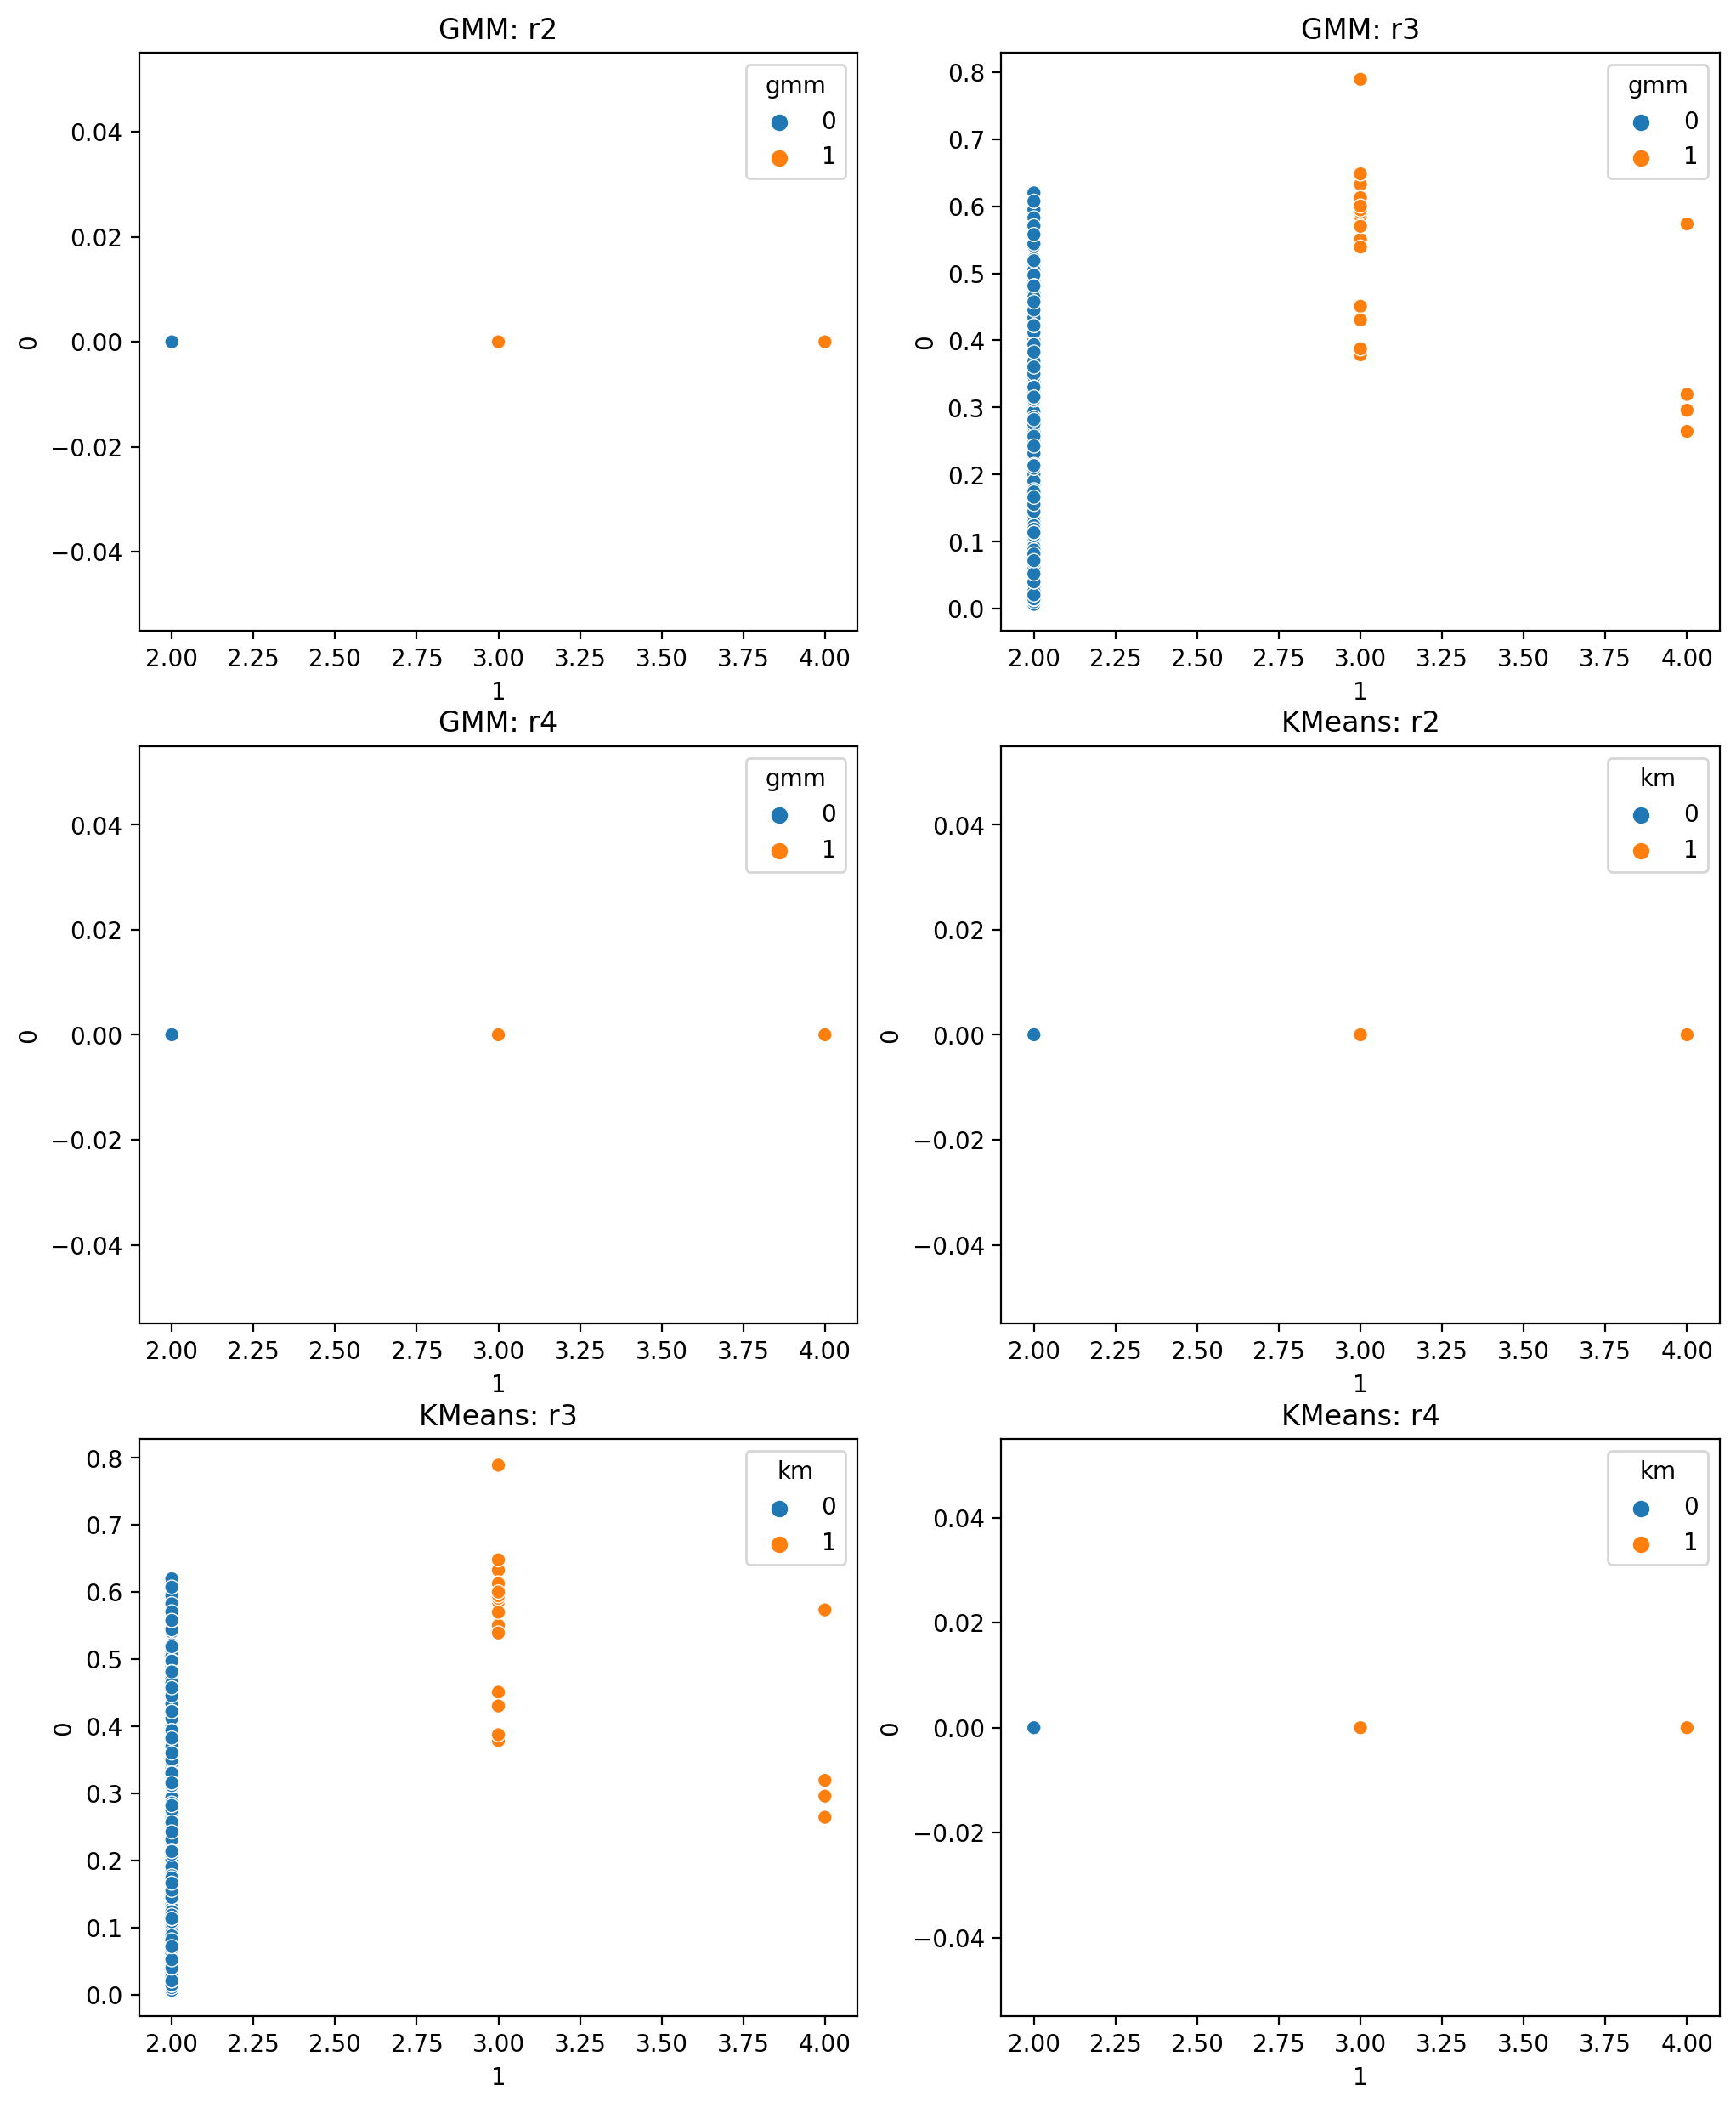

In [126]:
plt.figure(figsize=(12, 15), dpi=200)

plt.subplot(3, 2, 1)
sns.scatterplot(x=df_r2[1], y=df_r2[0], hue=df_r2['gmm'])
plt.title('GMM: r2')

plt.subplot(3, 2, 2)
sns.scatterplot(x=df_r3[1], y=df_r3[0], hue=df_r3['gmm'])
plt.title('GMM: r3')

plt.subplot(3, 2, 3)
sns.scatterplot(x=df_r4[1], y=df_r4[0], hue=df_r4['gmm'])
plt.title('GMM: r4')

plt.subplot(3, 2, 4)
sns.scatterplot(x=df_r2[1], y = df_r2[0], hue=df_r2['km'])
plt.title('KMeans: r2')

plt.subplot(3, 2, 5)
sns.scatterplot(x=df_r3[1], y=df_r3[0], hue=df_r3['km'])
plt.title('KMeans: r3')

plt.subplot(3, 2, 6)
sns.scatterplot(x=df_r4[1], y=df_r4[0], hue=df_r4['km'])
plt.title('KMeans: r4')